In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Sales-Data.csv')

In [3]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


## Sales Analysis

In [4]:
# Calculate the total sales across all orders
total_sales = df['Sales'].sum()
print(f"Total Sales: {total_sales}")

Total Sales: 34492035.97


In [5]:
# Find out which products are contributing most to sales
sales_by_product = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
print(sales_by_product)

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Sales, dtype: float64


In [6]:
# Determine which cities are generating the most sales
sales_by_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
print(sales_by_city)

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Sales, dtype: float64


## Quantity Analysis

In [7]:
# Calculate the total number of items sold
total_quantity = df['Quantity Ordered'].sum()
print(f"Total Quantity Ordered: {total_quantity}")

Total Quantity Ordered: 209079


In [8]:
# Find out which products are being ordered the most.
quantity_by_product = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
print(quantity_by_product)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64


## Time-Based Analysis

In [9]:
# Analyze which hours of the day have the highest sales
sales_by_hour = df.groupby('Hour')['Sales'].sum().sort_values(ascending=False).head(10)
print(sales_by_hour)

Hour
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
Name: Sales, dtype: float64


In [10]:
# Check how sales vary across months
sales_by_month = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)
print(sales_by_month)

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64


## Customer Behavior Analysis

In [11]:
# Calculate the average amount spent per order
aov = df['Sales'].mean()
print(f"Average Order Value (AOV): {aov}")

Average Order Value (AOV): 185.490916751815


## Product Performance

In [12]:
# Identify the top 10 products based on total sales
top_products = df.groupby('Product')['Sales'].sum().nlargest(10)
print(top_products)

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Name: Sales, dtype: float64


## Order Trends

<Axes: xlabel='Order Date'>

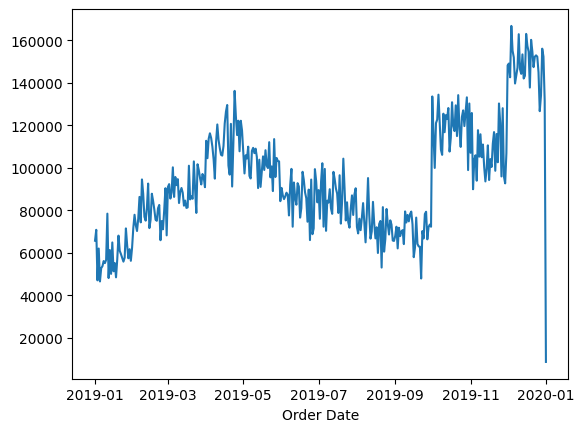

In [13]:
# Plot the trend of orders over time to identify seasonal spikes or drops
df['Order Date'] = pd.to_datetime(df['Order Date'])
orders_by_date = df.groupby(df['Order Date'].dt.date)['Sales'].sum()
orders_by_date.plot(kind='line')

## Top Product By City

In [14]:
# Top product by city
# Group the data by 'City' and 'Product', and sum the sales
top_product_per_city = df.groupby(['City', 'Product'])['Sales'].sum()

# Sort the sales within each city in descending order and take the top product for each city
top_product_per_city = top_product_per_city.groupby('City', group_keys=False).nlargest(1)

# Reset index
top_product_per_city = top_product_per_city.reset_index()

# Display the top product in each city
print(top_product_per_city)

             City             Product      Sales
0         Atlanta  Macbook Pro Laptop   644300.0
1          Austin  Macbook Pro Laptop   426700.0
2          Boston  Macbook Pro Laptop   814300.0
3          Dallas  Macbook Pro Laptop   649400.0
4     Los Angeles  Macbook Pro Laptop  1276700.0
5   New York City  Macbook Pro Laptop  1116900.0
6        Portland  Macbook Pro Laptop   572900.0
7   San Francisco  Macbook Pro Laptop  1931200.0
8         Seattle  Macbook Pro Laptop   605200.0


# Predictive model

## Data Preparation & Model Training

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Preprocessing (handling missing values, converting categorical variables, etc.)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Hour'] = df['Order Date'].dt.hour

# Features (X) and target (y)
X = df[['Quantity Ordered', 'Price Each', 'Month', 'Hour']]  # Features
y = df['Sales']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [16]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance (Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")


Mean Squared Error: 0.5946209638209196
R-squared: 0.9999946750789377


## Make prediction

In [17]:
#Example of predicting sales for new data
new_data = pd.DataFrame({
    'Quantity Ordered': [2],
    'Price Each': [300],
    'Month': [12],
    'Hour': [15]
})
predicted_sales = model.predict(new_data)
print(f"Predicted Sales: {predicted_sales[0]}")

Predicted Sales: 600.0


## Analyze Feature Importance

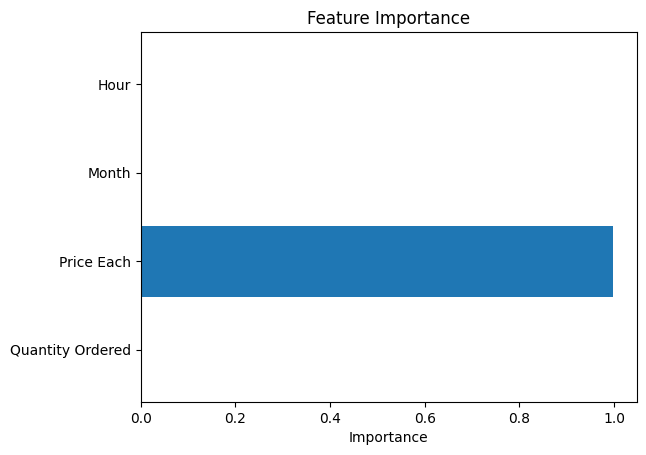

In [18]:
# Feature importance (which one impacting the sales more)

importance = model.feature_importances_
features = X.columns

# Plot the feature importance
plt.barh(features, importance)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

## What-If Analysis

In [19]:
# Simulate different scenarios
scenarios = pd.DataFrame({
    'Quantity Ordered': [1, 5, 10],
    'Price Each': [100, 200, 300],
    'Month': [12, 12, 12],
    'Hour': [10, 15, 20]
})
scenario_predictions = model.predict(scenarios)
print(scenarios.assign(Predicted_Sales=scenario_predictions))

   Quantity Ordered  Price Each  Month  Hour  Predicted_Sales
0                 1         100     12    10            99.99
1                 5         200     12    15           300.00
2                10         300     12    20           600.00


In [20]:
scenario_predictions.sum()

np.float64(999.9899999999981)

## Segment Customers or Transactions

In [21]:
# Add predictions to the original DataFrame
df['Predicted_Sales'] = model.predict(X)
# Filter high-value transactions
high_value_transactions = df[df['Predicted_Sales'] > 1000]
print(high_value_transactions)

        Unnamed: 0  Order ID             Product  Quantity Ordered  \
0                0    295665  Macbook Pro Laptop                 1   
52              52    295712  Macbook Pro Laptop                 1   
57              57    295717  Macbook Pro Laptop                 1   
223            223    295871  Macbook Pro Laptop                 1   
302            304    295948  Macbook Pro Laptop                 1   
...            ...       ...                 ...               ...   
185757       13429    222728  Macbook Pro Laptop                 1   
185775       13447    222744  Macbook Pro Laptop                 1   
185796       13468    222765  Macbook Pro Laptop                 1   
185857       13529    222822  Macbook Pro Laptop                 1   
185944       13616    222904  Macbook Pro Laptop                 1   

        Price Each          Order Date  \
0           1700.0 2019-12-30 00:01:00   
52          1700.0 2019-12-10 20:02:00   
57          1700.0 2019-12-25 09:

## Predicting Sales By Month

In [22]:
# Filter data for December
december_data = df[df['Month'] == 12].copy()

# Select relevant features for prediction
features_for_prediction = december_data[['Quantity Ordered', 'Price Each', 'Month', 'Hour']]

# Predict sales for December
predicted_sales = model.predict(features_for_prediction)
december_data['Predicted Sales'] = predicted_sales

# Calculate total predicted sales for December
total_predicted_sales = december_data['Predicted Sales'].sum()
print(f"Total Predicted Sales for December: ${total_predicted_sales:.2f}")

Total Predicted Sales for December: $4613292.08


### Simulate the Impact of Increased Quantity

In [23]:
# Backup the original column
december_data['Original Quantity Ordered'] = december_data['Quantity Ordered']

# Simulate a 10% increase in quantity ordered
december_data['Quantity Ordered'] = december_data['Quantity Ordered'] * 1.1

# Predict sales with increased quantity
features_with_increase = december_data[['Quantity Ordered', 'Price Each', 'Month', 'Hour']]
predicted_sales_with_increase = model.predict(features_with_increase)

# Calculate total predicted sales with increase
total_sales_with_increase = predicted_sales_with_increase.sum()
print(f"Predicted Sales with 10% Quantity Increase: ${total_sales_with_increase:.2f}")

# Restore the original column
december_data['Quantity Ordered'] = december_data['Original Quantity Ordered']
del december_data['Original Quantity Ordered']

Predicted Sales with 10% Quantity Increase: $4613341.37
